<a href="https://colab.research.google.com/github/Andbwol/Sber_lesson_3/blob/main/Sber_Bonds_25_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [178]:
import pandas as pd
import requests
import io
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import datetime as dt

In [ ]:
s=requests.get('https://iss.moex.com/iss/apps/infogrid/emission/rates.csv?iss.dp=comma&iss.df=%25d.%25m.%25Y&iss.tf=%25H:%25M:%25S&iss.dtf=%25d.%25m.%25Y%25H:%25M:%25S&iss.only=rates&limit=unlimited&lang=ru').content

In [ ]:
df=pd.read_csv(io.StringIO(s.decode('cp1251')), sep=';',header=1)

In [ ]:
df.shape

(2553, 55)

In [249]:
df.head

<bound method NDFrame.head of              SECID   SHORTNAME                            NAME  \
0     AMUNIBB2DER6  UBANK02/24        UNIBANK OJSC Series 1 21   
1     AT0000A2UF10  Raiff BIAG          Raiffeisen Bank Int AG   
2     CH0248531110  VTB-24 CHF         VTB CAPITAL S.A. 24 CHF   
3     CH0379268748  RZD-23 CHF          RZD Capital PLC 23 CHF   
4     CH0419041618  RZD-25 CHF  RZD CAPITAL PLC 0.898 03/10/25   
...            ...         ...                             ...   
2543  XS2420560869    BCS01/25           BCS SP Plc Series 239   
2544  XS2423361190  BCS02/27-4           BCS SP Plc Series 240   
2545  XS2429208486    BCS05/25           BCS SP Plc Series 243   
2546  XS2439218640  BCS06/25-B           BCS SP Plc Series 244   
2547  XS2446844321  BCS06/25-C           BCS SP Plc Series 245   

                         TYPENAME          ISIN REGNUMBER  LISTLEVEL  \
0     Корпоративные еврооблигации  AMUNIBB2DER6       NaN        3.0   
1     Корпоративные еврооблигации

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2553 entries, 0 to 2552
Data columns (total 55 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   SECID                   2553 non-null   object 
 1   SHORTNAME               2553 non-null   object 
 2   NAME                    2553 non-null   object 
 3   TYPENAME                2553 non-null   object 
 4   ISIN                    2553 non-null   object 
 5   REGNUMBER               2238 non-null   object 
 6   LISTLEVEL               2366 non-null   float64
 7   FACEVALUE               2553 non-null   object 
 8   FACEUNIT                2553 non-null   object 
 9   ISSUESIZE               2476 non-null   float64
 10  IS_COLLATERAL           2553 non-null   int64  
 11  IS_EXTERNAL             2553 non-null   int64  
 12  PRIMARY_BOARDID         2553 non-null   object 
 13  PRIMARY_BOARD_TITLE     2553 non-null   object 
 14  MATDATE                 2501 non-null   

In [77]:
df1 = df[['SHORTNAME', 'NAME', 'FACEVALUE', 'FACEUNIT','IS_QUALIFIED_INVESTORS','HIGH_RISK','COUPONDAYSPASSED','COUPONLENGTH', 'COUPONFREQUENCY','COUPONDATE', 'COUPONPERCENT', 'COUPONVALUE', 'EMITENTNAME', 'INN', 'PRICE', 'PRICE_RUB', 'SECSUBTYPE', 'MATDATE']]

In [78]:
df1.groupby('FACEUNIT').count()

,SHORTNAME,NAME,FACEVALUE,IS_QUALIFIED_INVESTORS,HIGH_RISK,COUPONDAYSPASSED,COUPONLENGTH,COUPONFREQUENCY,COUPONDATE,COUPONPERCENT,COUPONVALUE,EMITENTNAME,INN,PRICE,PRICE_RUB,SECSUBTYPE,MATDATE
FACEUNIT,,,,,,,,,,,,,,,,,
CHF,6,6,6,6,6,6,6,6,6,5,6,6,6,6,6,0,5
CNY,30,30,30,30,30,29,29,22,29,29,29,30,30,30,30,8,30
EUR,38,38,38,38,38,38,38,36,38,31,32,38,38,36,36,6,32
GBP,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,0,3
RUB,2191,2191,2191,2191,2191,2172,2185,1798,2185,2060,2062,2191,2191,2178,2178,229,2162
USD,280,280,280,280,280,272,275,268,275,216,216,280,275,260,260,23,263


In [79]:
df1=df1[(df1.FACEUNIT=='RUB')]

In [80]:
df1.isna().sum()

SHORTNAME                    0
NAME                         0
FACEVALUE                    0
FACEUNIT                     0
IS_QUALIFIED_INVESTORS       0
HIGH_RISK                    0
COUPONDAYSPASSED            19
COUPONLENGTH                 6
COUPONFREQUENCY            393
COUPONDATE                   6
COUPONPERCENT              131
COUPONVALUE                129
EMITENTNAME                  0
INN                          0
PRICE                       13
PRICE_RUB                   13
SECSUBTYPE                1962
MATDATE                     29
dtype: int64

In [83]:
df1 = df1.dropna(subset=['COUPONPERCENT','PRICE','COUPONFREQUENCY','COUPONVALUE', 'COUPONDAYSPASSED', 'MATDATE'])

In [84]:
df1.isna().sum()

SHORTNAME                    0
NAME                         0
FACEVALUE                    0
FACEUNIT                     0
IS_QUALIFIED_INVESTORS       0
HIGH_RISK                    0
COUPONDAYSPASSED             0
COUPONLENGTH                 0
COUPONFREQUENCY              0
COUPONDATE                   0
COUPONPERCENT                0
COUPONVALUE                  0
EMITENTNAME                  0
INN                          0
PRICE                        0
PRICE_RUB                    0
SECSUBTYPE                1593
MATDATE                      0
dtype: int64

In [253]:
df1[['SHORTNAME', 'NAME', 'FACEVALUE', 'FACEUNIT','COUPONDAYSPASSED','COUPONLENGTH', 'COUPONFREQUENCY','COUPONDATE', 'COUPONPERCENT', 'COUPONVALUE', 'EMITENTNAME','PRICE_RUB']]

,SHORTNAME,NAME,FACEVALUE,FACEUNIT,COUPONDAYSPASSED,COUPONLENGTH,COUPONFREQUENCY,COUPONDATE,COUPONPERCENT,COUPONVALUE,EMITENTNAME,PRICE_RUB
8,РЖД-19 обл,"""Российские ЖД"" ОАО 19 обл.","1000,0",RUB,167.0,182.0,2.0,10.07.2023,7.850,"39,14","открытое акционерное общество ""Российские желе...","1032,33"
9,ДОМ.РФ15об,ДОМ.РФ (АО) обл. сер. А15,"1000,0",RUB,102.0,184.0,2.0,15.09.2023,10.000,"50,41","Акционерное общество ""ДОМ.РФ""","1078,12"
10,РЖД-23 обл,"""Российские ЖД"" ОАО 23 обл.","1000,0",RUB,157.0,182.0,2.0,20.07.2023,7.850,"39,14","открытое акционерное общество ""Российские желе...","1020,08"
11,ГлДорога 3,Главная дорога АО об.сер. 03,"750,0",RUB,230.0,364.0,1.0,06.11.2023,16.990,"127,08","Акционерное общество ""Главная дорога""","1040,04"
12,ДОМ.РФ18об,ДОМ.РФ (АО) обл. сер.А18,"300,0",RUB,71.0,91.0,4.0,15.07.2023,7.710,"5,77","Акционерное общество ""ДОМ.РФ""","304,67"
...,...,...,...,...,...,...,...,...,...,...,...,...
2482,RZD-28 RUB,RZD Capital PLC 7.45 18/09/28,"100000,0",RUB,99.0,184.0,2.0,18.09.2023,7.450,"3725,0",RZD Capital plc,"95238,06"
2484,BCS07/26-2,BCS SP Plc Series 154,"100000,0",RUB,177.0,185.0,2.0,03.07.2023,8.500,"4308,2191",BrokerCreditService Structured Products Plc,"92270,0"
2495,VEON-26 RU,VEON Holdings B.V. 16/09/26,"100000,0",RUB,101.0,184.0,2.0,16.09.2023,8.125,"4062,5",VimpelCom Holdings B.V.,"97256,94"
2508,ALFA-25 RU,Alfa Bond Issuance 04/08/25,"100000,0",RUB,141.0,181.0,2.0,04.08.2023,7.850,"3925,0",Alfa Bond Issuance plc,"94316,39"


In [86]:
df1['COUPONPERCENT']=df1['COUPONPERCENT'].str.replace(',', '.').astype(float)

In [87]:
dist = []
K = range(2,11)

for k in K:

    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df1[['COUPONPERCENT']])
    dist.append(kmeans.inertia_)
    print(k,kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

2 11170.793034559798
3 4068.4704593404613
4 2351.5889652071864
5 1355.8071142023502
6 937.2812723494075
7 708.9264283646526
8 575.5536754848414
9 442.37977223525525
10 351.82111449945126


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0, 0.5, 'Inertia')

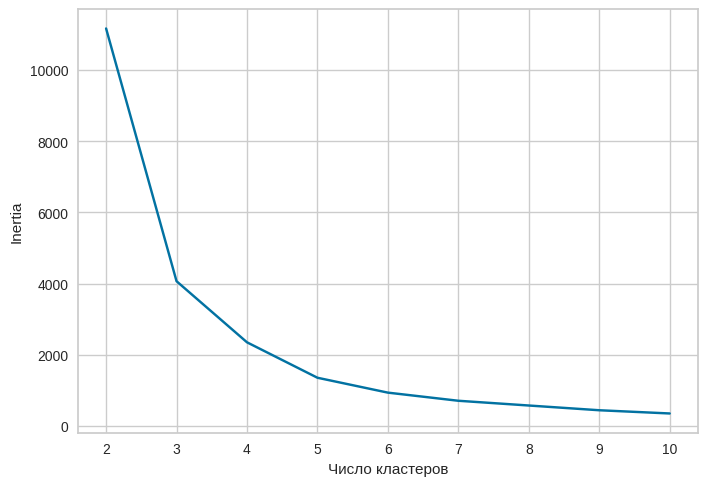

In [88]:
plt.plot(K, dist, 'bx-')
plt.xlabel('Число кластеров')
plt.ylabel('Inertia')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

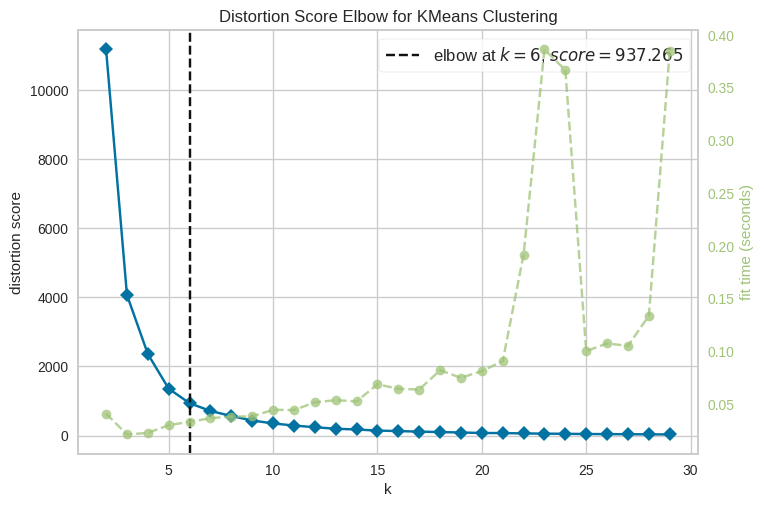

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [89]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()

# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30), timings= True)
visualizer.fit(df1[['COUPONPERCENT']])        # Fit data to visualizer
visualizer.show()        # Finalize and render figure

Оптимально выделить 5 кластеров

In [90]:
kmeans = KMeans(n_clusters=5, random_state=42)
df1['Cluster']=kmeans.fit_predict(df1[['COUPONPERCENT']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [91]:
df2=df1[['COUPONPERCENT', 'Cluster']].groupby(['Cluster']).COUPONPERCENT.agg(count='count',mean='mean').sort_values(by='mean').reset_index()

In [92]:
df2

,Cluster,count,mean
0,1,287,0.242906
1,2,481,7.067152
2,0,595,9.474934
3,4,257,12.861078
4,3,61,17.747246


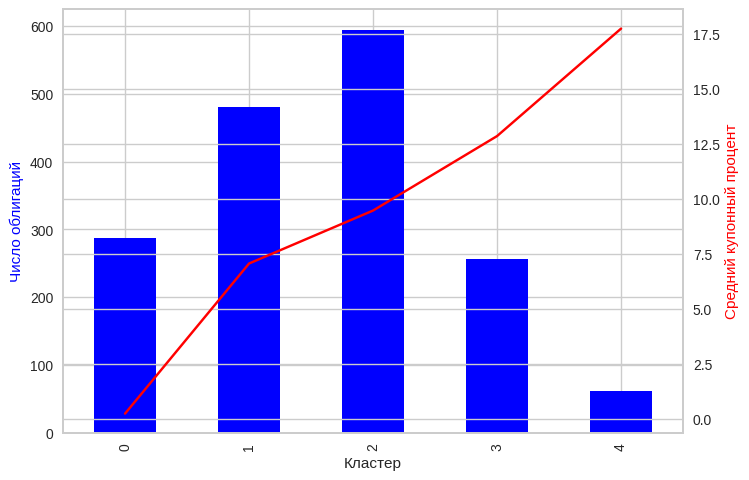

In [93]:
plt.xlabel('Кластер')
ax1 = df2['count'].plot(kind='bar', color='blue')
ax1.set_ylabel('Число облигаций',color="blue")
ax2 = ax1.twinx()
ax2 = df2['mean'].plot(color="red")
ax2.set_ylabel("Средний купонный процент",color="red")
plt.show()

Выбираем облигации с низким риском

In [94]:
df3=df1[(df1.HIGH_RISK==0)]

In [95]:
df3['FACEVALUE']=df3['FACEVALUE'].str.replace(',', '.').astype(float)
df3['COUPONVALUE']=df3['COUPONVALUE'].str.replace(',', '.').astype(float)
df3['PRICE_RUB']=df3['PRICE_RUB'].str.replace(',', '.').astype(float)

<ipython-input-95-07aa177adac6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['FACEVALUE']=df3['FACEVALUE'].str.replace(',', '.').astype(float)
<ipython-input-95-07aa177adac6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['COUPONVALUE']=df3['COUPONVALUE'].str.replace(',', '.').astype(float)
<ipython-input-95-07aa177adac6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

In [96]:
df3['COUPONAGE'] = df3['COUPONDAYSPASSED'] / df3['COUPONLENGTH']

<ipython-input-96-c572df33706d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['COUPONAGE'] = df3['COUPONDAYSPASSED'] / df3['COUPONLENGTH']


In [97]:
df4 = df3.loc[df3['COUPONAGE']<=0.2]

In [98]:
df4.reset_index(drop=True, inplace=True)

In [213]:
df4['NKD']= df4['FACEVALUE']*df4['COUPONAGE']*(df4['COUPONPERCENT']/df4['COUPONFREQUENCY'])/100

<ipython-input-213-ce8f5d626ec7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['NKD']= df4['FACEVALUE']*df4['COUPONAGE']*(df4['COUPONPERCENT']/df4['COUPONFREQUENCY'])/100


In [214]:
df4['Delta'] = df4['FACEVALUE'] - df4['PRICE_RUB']

<ipython-input-214-c613e2ef86e5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Delta'] = df4['FACEVALUE'] - df4['PRICE_RUB']


In [101]:
df4['Delta']=df4['Delta']*df4['Delta'].apply(lambda x: 0.87 if x > 0 else 1)

<ipython-input-101-686eb6da476b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Delta']=df4['Delta']*df4['Delta'].apply(lambda x: 0.87 if x > 0 else 1)


In [226]:
df4['Buy'] = (df4['PRICE_RUB'] + df4['NKD'])*(1+0.06/100+0.0125/100)

<ipython-input-226-c35da4e98553>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Buy'] = (df4['PRICE_RUB'] + df4['NKD'])*(1+0.06/100+0.0125/100)


In [227]:
df4['Sell'] = (df4['Delta'] + 0.87 * df4['COUPONVALUE'] * df4['COUPONFREQUENCY'])

<ipython-input-227-cd95a9402d08>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Sell'] = (df4['Delta'] + 0.87 * df4['COUPONVALUE'] * df4['COUPONFREQUENCY'])


In [228]:
df4[['Buy','Sell','PRICE_RUB','FACEVALUE','NKD','Delta','COUPONVALUE','COUPONFREQUENCY','COUPONPERCENT','COUPONAGE']]

,Buy,Sell,PRICE_RUB,FACEVALUE,NKD,Delta,COUPONVALUE,COUPONFREQUENCY,COUPONPERCENT,COUPONAGE
0,1305.430587,-204.435600,1295.02,1000.0,9.464835,-295.02,52.0600,2.0,10.44,0.181319
1,1219.168092,-118.235600,1208.82,1000.0,9.464835,-208.82,52.0600,2.0,10.44,0.181319
2,1008.250452,68.351200,1004.52,1000.0,3.000000,-4.52,41.8800,2.0,8.40,0.071429
3,1006.849437,69.751200,1003.12,1000.0,3.000000,-3.12,41.8800,2.0,8.40,0.071429
4,999.577484,65.434800,992.89,1000.0,5.963315,7.11,33.5200,2.0,6.65,0.179348
...,...,...,...,...,...,...,...,...,...,...
374,104109.550828,2454.700000,103461.30,100000.0,572.826087,-3461.30,3400.0000,2.0,6.80,0.168478
375,94228.758160,11441.000000,94040.00,100000.0,120.491803,5960.00,3150.0000,2.0,6.30,0.038251
376,90199.281529,20498.602642,89970.00,100000.0,163.934426,10030.00,6016.4383,2.0,12.00,0.027322
377,92167.920873,16404.881000,91970.00,100000.0,131.147541,8030.00,4813.1500,2.0,9.60,0.027322


In [225]:
df4.loc[1]

SHORTNAME                                                            ЗСД 02
NAME                                            Запад.скор.диаметр АО об.02
FACEVALUE                                                            1000.0
FACEUNIT                                                                RUB
IS_QUALIFIED_INVESTORS                                                    0
HIGH_RISK                                                                 0
COUPONDAYSPASSED                                                       33.0
COUPONLENGTH                                                          182.0
COUPONFREQUENCY                                                         2.0
COUPONDATE                                                       21.11.2023
COUPONPERCENT                                                         10.44
COUPONVALUE                                                           52.06
EMITENTNAME               Акционерное общество "Западный скоростной диам...
INN         

In [229]:
df4['Profit']=df4['Sell']*100/df4['Buy']

<ipython-input-229-35604fd4aab0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Profit']=df4['Sell']*100/df4['Buy']


In [230]:
df4.shape

(379, 27)

<ipython-input-231-eca9a21f6edd>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df4['Profit'], hist=True, kde=False,


Text(0, 0.5, 'Число облигаций')

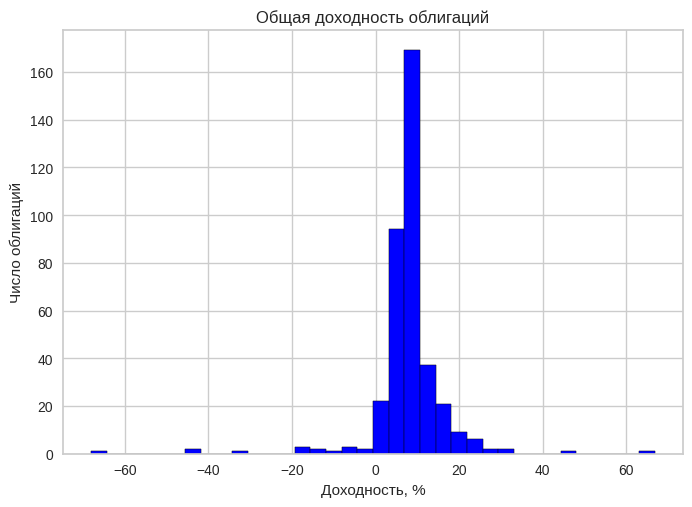

In [231]:
import seaborn as sns

# matplotlib histogram
plt.hist(df4['Profit'], color = 'blue', edgecolor = 'black',
         bins = int(180/5))

# seaborn histogram
sns.distplot(df4['Profit'], hist=True, kde=False,
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Общая доходность облигаций')
plt.xlabel('Доходность, %')
plt.ylabel('Число облигаций')

In [254]:
df5 = df4.loc[df4['Profit']>0].sort_values(by='Profit')

In [255]:
df5.shape

(364, 27)

<ipython-input-256-3169299b7058>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df5['Profit'], hist=True, kde=False,


Text(0, 0.5, 'Число облигаций')

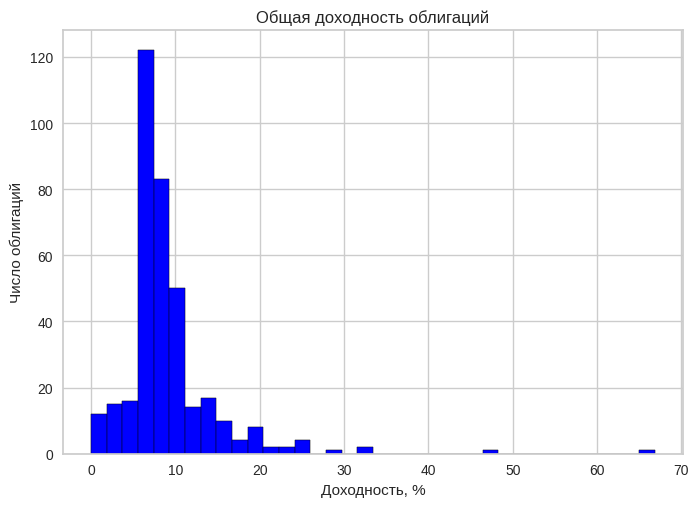

In [256]:
# matplotlib histogram
plt.hist(df5['Profit'], color = 'blue', edgecolor = 'black',
         bins = int(180/5))

# seaborn histogram
sns.distplot(df5['Profit'], hist=True, kde=False,
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Общая доходность облигаций')
plt.xlabel('Доходность, %')
plt.ylabel('Число облигаций')

In [259]:
df10 = df4.loc[df4['Profit']>25].sort_values(by='Profit', ascending=False)

In [265]:
df10[['NAME','Buy','Sell','PRICE_RUB','FACEVALUE','COUPONVALUE','COUPONFREQUENCY','COUPONPERCENT','COUPONAGE','Profit','MATDATE','SECSUBTYPE','IS_QUALIFIED_INVESTORS']]

,NAME,Buy,Sell,PRICE_RUB,FACEVALUE,COUPONVALUE,COUPONFREQUENCY,COUPONPERCENT,COUPONAGE,Profit,MATDATE,SECSUBTYPE,IS_QUALIFIED_INVESTORS
29,"""Российские ЖД"" ОАО 35 обл.",6.677758e+02,4.463948e+02,665.87,1000.0,64.52,2.0,12.94,0.021978,66.848009,30.05.2040,NaN,0
368,ОФЗ-ПД 26238 15/05/2041,7.234351e+02,3.421960e+02,719.40,1000.0,35.40,2.0,7.10,0.098901,47.301548,15.05.2041,NaN,0
366,ОФЗ-ПД 26225 10/05/34,8.050068e+02,2.648510e+02,798.05,1000.0,36.15,2.0,7.25,0.175824,32.900466,10.05.2034,NaN,0
131,Банк ВТБ ПАО Т2-3,8.126024e+06,2.668661e+06,8060136.99,10000000.0,418849.32,2.0,8.40,0.142857,32.840917,21.05.2030,Субординированные облигации,1
373,BCS SP Plc Series 34,8.514196e+04,2.466622e+04,84930.00,100000.0,5515.07,2.0,11.00,0.027322,28.970701,20.12.2023,NaN,1
255,Сбербанк 002СУБ-03R,8.596475e+06,2.217282e+06,8520191.78,10000000.0,423835.62,2.0,8.50,0.164835,25.792924,14.11.2031,Субординированные облигации,1
224,Банк ВТБ (ПАО) Б-1-217,8.000965e+02,2.005770e+02,799.51,1000.0,0.05,2.0,0.01,0.137363,25.069100,25.11.2026,NaN,1
261,Банк ВТБ (ПАО) Б-1-246,8.003810e+02,2.002870e+02,799.80,1000.0,0.05,2.0,0.01,0.021978,25.023959,16.12.2026,NaN,1
183,Банк ВТБ (ПАО) Б-1-153,8.004832e+02,2.001870e+02,799.90,1000.0,0.05,2.0,0.01,0.065934,25.008269,09.12.2025,NaN,0


Проверим, какой срок до погашения у облигаций

In [266]:
df5['MATDATE']=pd.to_datetime(df5['MATDATE'], format='%d.%m.%Y').dt.date

In [267]:
df5['MATDATE']

346    2026-06-19
72     2024-04-18
345    2024-05-22
73     2024-05-31
71     2024-06-05
          ...    
373    2023-12-20
131    2030-05-21
366    2034-05-10
368    2041-05-15
29     2040-05-30
Name: MATDATE, Length: 364, dtype: object

In [268]:
df5['DAYSLEFT']=(df5['MATDATE']-dt.date.today()).dt.days

In [269]:
df5['DAYSLEFT']

346    1090
72      298
345     332
73      341
71      346
       ... 
373     178
131    2522
366    3972
368    6534
29     6184
Name: DAYSLEFT, Length: 364, dtype: int64

In [239]:
df5.sort_values(by='Profit', ascending = False).head(5)

,SHORTNAME,NAME,FACEVALUE,FACEUNIT,IS_QUALIFIED_INVESTORS,HIGH_RISK,COUPONDAYSPASSED,COUPONLENGTH,COUPONFREQUENCY,COUPONDATE,...,Cluster,COUPONAGE,NKD,Delta,Profit,BUY,SELL,Buy,Sell,DAYSLEFT
29,РЖД-35 обл,"""Российские ЖД"" ОАО 35 обл.",1000.0,RUB,0,0,4.0,182.0,2.0,20.12.2023,...,4,0.021978,1.421978,334.13,66.848009,6.677758e+02,4.463948e+02,6.677758e+02,4.463948e+02,6184
368,ОФЗ 26238,ОФЗ-ПД 26238 15/05/2041,1000.0,RUB,0,0,18.0,182.0,2.0,06.12.2023,...,2,0.098901,3.510989,280.60,47.301548,7.234351e+02,3.421960e+02,7.234351e+02,3.421960e+02,6534
366,ОФЗ 26225,ОФЗ-ПД 26225 10/05/34,1000.0,RUB,0,0,32.0,182.0,2.0,22.11.2023,...,2,0.175824,6.373626,201.95,32.900466,8.050068e+02,2.648510e+02,8.050068e+02,2.648510e+02,3972
131,ВТБ Т2-3,Банк ВТБ ПАО Т2-3,10000000.0,RUB,1,0,26.0,182.0,2.0,28.11.2023,...,0,0.142857,60000.000000,1939863.01,32.840917,8.126024e+06,2.668661e+06,8.126024e+06,2.668661e+06,2522
373,BCS12/23-3,BCS SP Plc Series 34,100000.0,RUB,1,0,5.0,183.0,2.0,20.12.2023,...,0,0.027322,150.273224,15070.00,28.970701,8.514196e+04,2.466622e+04,8.514196e+04,2.466622e+04,178


In [270]:
df6 = df5.loc[(df5.DAYSLEFT<366)&(df5.IS_QUALIFIED_INVESTORS==0)&(df5.COUPONPERCENT>7.5)]

In [271]:
df6.shape

(28, 28)

In [276]:
df6[['NAME','EMITENTNAME','COUPONPERCENT','DAYSLEFT','COUPONFREQUENCY','Profit']].sort_values(by='Profit', ascending=False).head(10)

,NAME,EMITENTNAME,COUPONPERCENT,DAYSLEFT,COUPONFREQUENCY,Profit
242,реСтор 001Р-01,"Общество с ограниченной ответственностью ""реСтор""",8.10,354,4.0,11.019447
208,АПРИ Флай Плэнинг АО БО-П04,"Акционерное общество АПРИ ""Флай Плэнинг""",13.00,178,4.0,10.928025
179,MT-FREE-02,"Акционерное общество ""МаксимаТелеком""",9.75,331,2.0,10.005511
207,ТД РКС 002Р-01,"Общество с ограниченной ответственностью ""Торг...",12.50,178,4.0,9.638179
298,Интерлизинг 001Р-03,"Общество с ограниченной ответственностью ""Инте...",12.50,360,4.0,9.562459
171,Регион-Продукт БО 001Р-01,"Акционерное общество ""РЕГИОН-ПРОДУКТ""",12.00,88,4.0,9.322560
7,Ашинский метзавод ПАО БО-01,"Публичное акционерное общество ""Ашинский метал...",9.00,358,2.0,9.271540
219,ТАЛАН-ФИНАНС БО 001Р-02,"Общество с ограниченной ответственностью ""ТАЛА...",10.50,262,4.0,9.135038
109,Калужская сбытовая комп 1P 01,"Публичное акционерное общество ""Калужская сбыт...",11.20,169,2.0,8.999514
201,Охта Групп БО-П01,"Общество с ограниченной ответственностью ""Охта...",12.00,171,4.0,8.716191
